# Instalar gradio

In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.1 MB/s eta 0:

# Montar carpeta de proyecto en Google Drive

https://github.com/rolandex25g/rodiucan.git
En github estan los modelos ya entrenados en .H5, el dataset original de entrenamiento. Lo mínimo para ejecutar el modelo ya entrenado.
Tamaño aproximado: 400MB

https://gitlab.com/rolandex25/rodiucan.git
En gitlab estan los modelos ya entrenados en .H5, el dataset original de entrenamiento. Los cuadernos para el preprocesamiento, entrenamiento, y las pruebas. Todo lo necesario para repetir el experimento con el mismo dataset o con otro.
Tamaño aproximado: 1.0GB

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

if not(os.path.isdir("/content/drive/MyDrive/rodiucan")):
    %cd /content/drive/MyDrive
    !git clone https://github.com/rolandex25g/rodiucan.git

%cd /content/drive/MyDrive/rodiucan/ColabNotebooks
#Lugar donde estan los modelos
directorio_salida='/content/drive/MyDrive/rodiucan/salida/'

Mounted at /content/drive
/content/drive/MyDrive
Cloning into 'rodiucan'...
remote: Enumerating objects: 866, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 866 (delta 6), reused 34 (delta 6), pack-reused 827
Receiving objects: 100% (866/866), 1.46 GiB | 14.28 MiB/s, done.
Resolving deltas: 100% (370/370), done.
Updating files: 100% (120/120), done.
/content/drive/MyDrive/rodiucan/ColabNotebooks


# Montar carpeta de proyecto en disco local

In [ ]:
#Lugar donde estan los modelos
#directorio_salida='d:/rodiucan/salida/'

# Importar librerias

In [3]:
import gradio as gr
from libreria import *
from estructura_modelo import *

# Ejemplo de uso del modelo

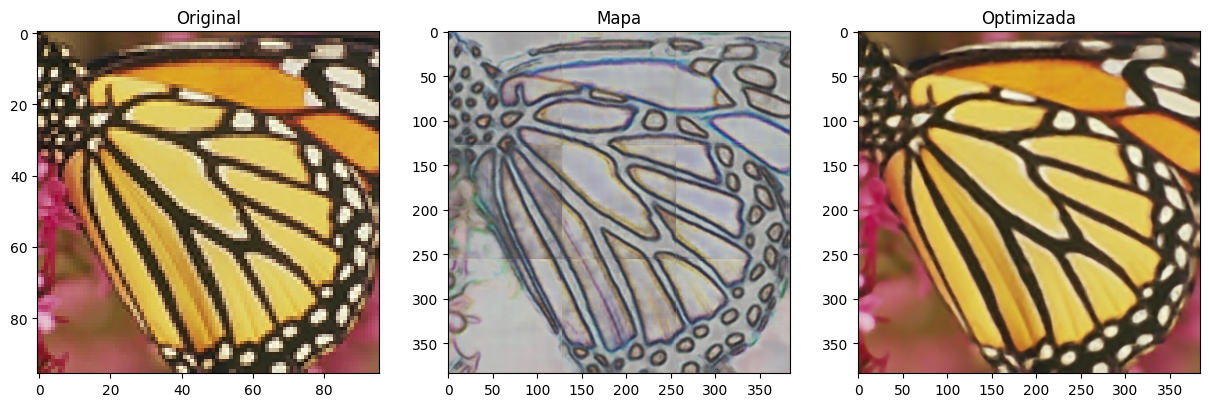

In [4]:
def RODIUCAN_aplicar_modeloAC_a_imagenesRGB_COMBINADAColor(xmodelo1,xmodelo2,img_reducida,n_repetir_modelo2=0):
    #Reducir el ruido gaussiano en la imagen
    #Puede reducirse un poco el ruido para obtener una mejor deteccion de bordes, a costa de sacrificar un poco de detalle en texturas.
    #img_reducida=cv2.fastNlMeansDenoisingColored(img_reducida,None,2,2,7,21)

    xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(img_reducida)
    #Aplicar modelo RNA
    decoded_maps = xmodelo1(xdata_img_reducida_array_nor).numpy()
    img_mapa=unir_parches_en_imagenColor(decoded_maps,img_reducida[:,:,0])
    #-----------------------
    xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizarColor(img_mapa)
    xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
    for k in range(0,n_repetir_modelo2):
        decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
        ximagen=unir_parches_en_imagenColor(decoded_imgs,img_reducida[:,:,0])
        xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(ximagen)
        xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
    decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
    ximagen=unir_parches_en_imagenColor(decoded_imgs,img_reducida[:,:,0])

    #Aplicar el modelo a la imagen con bordes ampliados
    ximagenDD=get_aplicar_modeloAC_a_imagenes_DD_COMBINADAColor(xmodelo1,xmodelo2,img_reducida,n_repetir_modelo2)

    ximagenR=ajustarBrillo(ximagen[:,:,0],img_mapa[:,:,0])
    ximagenR=difuminarBordes(ximagenR,img_mapa[:,:,0])
    ximagenR=combinarBordesDD(ximagenR,ximagenDD[:,:,0])

    ximagenG=ajustarBrillo(ximagen[:,:,1],img_mapa[:,:,1])
    ximagenG=difuminarBordes(ximagenG,img_mapa[:,:,1])
    ximagenG=combinarBordesDD(ximagenG,ximagenDD[:,:,1])

    ximagenB=ajustarBrillo(ximagen[:,:,2],img_mapa[:,:,2])
    ximagenB=difuminarBordes(ximagenB,img_mapa[:,:,2])
    ximagenB=combinarBordesDD(ximagenB,ximagenDD[:,:,2])

    #Unir los 3 canales de la imagen
    ximagen=np.zeros((ximagenR.shape[0],ximagenR.shape[1],3))
    ximagen[:,:,0]=ximagenR[:,:]
    ximagen[:,:,1]=ximagenG[:,:]
    ximagen[:,:,2]=ximagenB[:,:]
    yimagen=ximagen.astype(np.uint8)
    return img_mapa,yimagen

def optimizar(img,n_repetir_modelo2=0):
    original_tamy=img.shape[0]
    original_tamx=img.shape[1]
    #Redimensionar a multiplo 128x128
    tamsegy=int((img.shape[0]*4)/TAM_PARCHE)
    tamsegx=int((img.shape[1]*4)/TAM_PARCHE)
    nuevoy=tamsegy*TAM_PARCHE
    nuevox=tamsegx*TAM_PARCHE
    if(nuevoy<TAM_PARCHE):
        nuevoy=TAM_PARCHE
    if(nuevox<TAM_PARCHE):
        nuevox=TAM_PARCHE
    #Puede usarse el redimensionamiento por interpolación bicubica o vecinos mas cercanos
    img2 = cv2.resize(img, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)
    #img2 = cv2.resize(img, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_NEAREST)

    xxnomarchivo='redautoencoderEB128RGB.h5'
    redautoencoder_eb_rgb=RedAutoencoderEB_RGB()
    redautoencoder_eb_rgb.load_weights(directorio_salida+xxnomarchivo)

    xxnomarchivo='redautoencoderAC2_128RGB.h5'
    redautoencoder_rgb=RedAutoencoder_RGB()
    redautoencoder_rgb.load_weights(directorio_salida+xxnomarchivo)

    img_map,img_res=RODIUCAN_aplicar_modeloAC_a_imagenesRGB_COMBINADAColor(redautoencoder_eb_rgb,redautoencoder_rgb,img2,n_repetir_modelo2)
    img_res = cv2.resize(img_res, dsize=(original_tamx*4,original_tamy*4), interpolation=cv2.INTER_CUBIC)
    return img,img_map,img_res

img = cv2.imread('prueba001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgOriginal,imgMapa,imgOptimizada=optimizar(img,0)

tablag=plt.figure(figsize=(15, 15))
c1=tablag.add_subplot(1,3,1)
plt.title('Original')
plt.imshow(imgOriginal)

c1=tablag.add_subplot(1,3,2)
plt.title('Mapa')
plt.imshow(imgMapa)

c1=tablag.add_subplot(1,3,3)
plt.title('Optimizada')
plt.imshow(imgOptimizada)

# Con interfaz gradio usando Interface

In [5]:
#ent=gr.Image(shape=(200, 200))
demo = gr.Interface(fn=optimizar, inputs=gr.Image(), outputs=["image","image","image"], examples=["prueba001.png","prueba006.png","prueba015.png"])
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# Con interfaz gradio usando bloques

In [6]:
with gr.Blocks() as demo:
    #ent=gr.Image(shape=(200, 200))
    ent=gr.Image()
    #inp = gr.Textbox(label="Repetir")
    inp = gr.Slider(0, 5,value=0,step=1,label="Repetir")
    gr.Examples(["prueba001.png","prueba006.png","prueba015.png"],inputs=ent)
    with gr.Row():
        s1=gr.Image(label="Original")
        s2=gr.Image(label="Mapa")
        s3=gr.Image(label="Optimizada")
    btn = gr.Button(value="Submit")

    btn.click(optimizar, inputs=[ent,inp], outputs=[s1,s2,s3])

if __name__ == "__main__":
    demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>